fold 1 : {TRAIN: [2 3 4 5 6 7] , TEST: [0 1] }
fold 2 : {TRAIN: [0 1 3 4 5 7] , TEST: [2 6] }
fold 3 : {TRAIN: [0 1 2 4 6 7] , TEST: [3 5] }
fold 4 : {TRAIN: [0 1 2 3 5 6] , TEST: [4 7] }


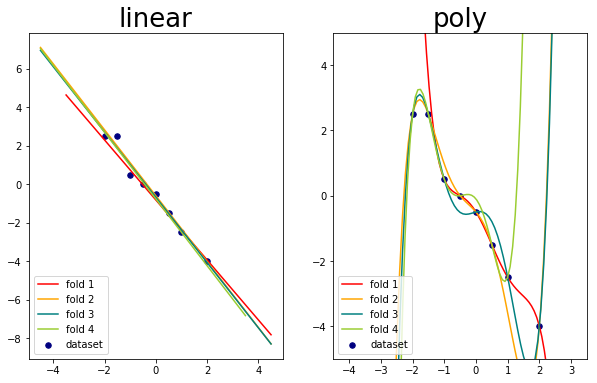

,Linear,Poly (deg=5)
Training MAE,,
fold1,0.212851,3.60822e-15
fold2,0.289474,2.16493e-15
fold3,0.26294,1.48955e-15
fold4,0.147619,3.15488e-15


,Linear,Poly (deg=5)
Testing MAE,,
fold1,0.405622,0.785714
fold2,0.0973684,0.609933
fold3,0.243789,24.45
fold4,0.589286,6.79167


In [2]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# 4-fold  CV
from sklearn.model_selection import KFold
X = np.array([-2, -1.5, -1, -0.5, 0, 0.5, 1, 2]) 
y = np.array([2.5, 2.5, 0.5, 0, -0.5, -1.5, -2.5, -4])
num_of_folds = 4 
# Here, the parameter 'shuffle=True' provides the random permutation on the dataset.
kf = KFold(n_splits=num_of_folds, shuffle=True)

# regression result table
row = ['fold1', 'fold2', 'fold3', 'fold4']
col = ['Linear', 'Poly (deg=5)']
trainResult = pd.DataFrame(index=row, columns=col)
testResult = pd.DataFrame(index=row, columns=col)
trainResult.index.name="Training MAE"
testResult.index.name="Testing MAE"

# regression 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

colors = ['red', 'orange', 'teal', 'yellowgreen', 'blue']
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
i = 0
c = 0

# plot training points
plt.subplot(1,2,1)
plt.scatter(X, y, color='navy', s=30, marker='o', label="dataset")
plt.title('linear', fontsize=26)

plt.subplot(1,2,2)
plt.scatter(X, y, color='navy', s=30, marker='o', label="dataset")
plt.title('poly', fontsize=26)

# Iterate each fold
for train_index, test_index in kf.split(X):
    print('fold '+str(i+1),": {TRAIN:", train_index, ", TEST:", test_index, "}")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    xLimit = X_train.min()-2.5, X_train.max()+2.5
    yLimit = y_train.min()-2.5, y_train.max()+2.5
    
    # use linspace for plot regression line
    x_plot = np.linspace(xLimit[0], xLimit[1], 100)
    
    # create matrix versions of these arrays
    X_train = X_train[:, np.newaxis]
    X_test = X_test[:, np.newaxis]
    X_plot = x_plot[:, np.newaxis]

        
    # set limit of axis
    plt.xlim(xLimit)
    plt.ylim(yLimit)
    
    # Train & Predict
    for count, degree in enumerate([1, 5]):
        
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(X_train, y_train)
        y_plot = model.predict(X_plot) # predict regression line
        plt.subplot(1,2,count+1)
        plt.plot(x_plot, y_plot, color=colors[c], label="fold %d" % (i+1) )
        plt.legend(loc='lower left')
        # Record MAE
        trainResult.iloc[i-1, count] = mean_absolute_error(y_train, model.predict(X_train))
        testResult.iloc[i-1, count] = mean_absolute_error(y_test, model.predict(X_test))
        
    c = (c + 1)%5
    i +=1
    
plt.show()

# show MAE
display(trainResult, testResult)